In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import os

# Rename all files

In [ ]:
src = ""


def rename_files(root, file, patient_id):
    if 'RTDOSE' in file:
        new_name = f"rtdose_{patient_id}.nrrd"
    elif 'GTV' in file:
        new_name = f"gtv_{patient_id}.nrrd"
    else :
        return
    old_file_path = os.path.join(root, file)
    new_file_path = os.path.join(root, new_name)
    os.rename(old_file_path, new_file_path)

def rename_mri_files(root, files, patient_id):
    mri_files = sorted([f for f in files if 'mr' in f.lower() and f.endswith('.nrrd')],
                       key=lambda x: x.split('_')[-1])
    
    if len(mri_files) == 2:
        pre_mri, post_mri = mri_files
        
        if "pre" in pre_mri or "post" in post_mri:
            return
        
        base_name_pre = "_".join(pre_mri.split('_')[:-1])
        base_name_post = "_".join(post_mri.split('_')[:-1])
        
        date_pre = pre_mri.split('_')[-1].split('.')[0]
        date_post = post_mri.split('_')[-1].split('.')[0]
        new_name_pre = f"{base_name_pre}_pre_{date_pre}.nrrd"
        new_name_post = f"{base_name_post}_post_{date_post}.nrrd"
        
        
        old_file_path_pre = os.path.join(root, pre_mri)
        new_file_path_pre = os.path.join(root, new_name_pre)
        os.rename(old_file_path_pre, new_file_path_pre)

        old_file_path_post = os.path.join(root, post_mri)
        new_file_path_post = os.path.join(root, new_name_post)
        os.rename(old_file_path_post, new_file_path_post)


for root, dirs, files in os.walk(src):
    patient_id = root.split(os.sep)[-1].split("_")[0].lower()
    rename_mri_files(root, files, patient_id)

    for file in files:
        if file.endswith(".nrrd"):
            rename_files(root, file, patient_id)



# Load data 

In [2]:
def load_data(folder):

    pre_treatment_mri = None
    post_treatment_mri = None
    rtdose = None
    gtv = None
    

    for file in os.listdir(folder):
        if file.endswith('.nii'):
            file_path = os.path.join(folder, file)
            data_nifti = nib.load(file_path)
            data = np.array(data_nifti.dataobj, dtype=np.float32)
            if 'pre' in file:
                pre_treatment_mri = data
            elif 'post' in file:
                post_treatment_mri = data
            elif 'RTDOSE' in file:
                rtdose = data
            elif 'GTV' in file:
                gtv = data
    
    return pre_treatment_mri, post_treatment_mri, rtdose, gtv

In [3]:
folder = "./data"
dataset = []

for root, dirs, files in os.walk(folder):
    for d in dirs:
        path = os.path.join(root, d)
        pre_treatment_mri, post_treatment_mri, rtdose, gtv= load_data(path)
        dataset.append((pre_treatment_mri, post_treatment_mri, rtdose, gtv))
        

In [4]:
def show_shapes(patient):
    print(f"Pre-treatment MRI shape: {patient[0].shape}")
    print(f"Post-treatment MRI shape: {patient[1].shape}")
    print(f"RTDOSE shape: {patient[2].shape}")
    print(f"GTV shape: {patient[3].shape}")

#show_shapes(dataset[0])
print(dataset[0])

(array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  1.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 9.,  5.,  3., ...,  0.,  0.,  0.],
        [10.,  7.,  4., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  2.,  1., ...,  0.,  0.,  0.],
        [ 1.,  1.,  1., ...,  0.,  0.,  0.],
        ...,
        [ 6.,  1.,  7., ...,  0.,  0.,  0.],
        [ 6.,  2.,  9., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  2., ...,  0.,  0.,  0.],
        [ 0.,  1.,  2., ...,  0.,  0.,  0

In [5]:
def show_slice(data, slice_idx):
    fig, axes = plt.subplots(2, 2)

    axes[0, 0].imshow(pre_treatment_mri[:, :, 80], cmap='bone')
    axes[0, 0].set_title('Pre-treatment MRI')
    axes[0, 1].imshow(post_treatment_mri[:, :, 80], cmap='bone')
    axes[0, 1].set_title('Post-treatment MRI')
    axes[1, 0].imshow(rtdose[:, :, 80], cmap='bone')
    axes[1, 0].set_title('RTDOSE')
    axes[1, 1].imshow(gtv[:, :, 80], cmap='bone')
    axes[1, 1].set_title('GTV')

    for ax in axes.flatten():
        ax.axis('off')
    
    plt.tight_layout()
    ax_slider = plt.axes([0.25, 0.01, 0.65, 0.03], facecolor='lightgoldenrodyellow')

    slider = Slider(ax_slider, 'Slice', 0, 9, valinit=0, valstep=1)

    def update(val):

        slice_idx = int(slider.val)
        axes[0, 0].imshow(pre_treatment_mri[:, :, slice_idx], cmap='bone')
        axes[0, 1].imshow(post_treatment_mri[:, :, slice_idx], cmap='bone')
        axes[1, 0].imshow(rtdose[:, :, slice_idx], cmap='bone')
        axes[1, 1].imshow(gtv[:, :, slice_idx], cmap='bone')
        fig.canvas.draw_idle()

    slider.on_changed(update)

    plt.show()


# Extract in pre/post mri only frames with GTV

In [6]:
def extract_frames_with_gtv(shape_data, pre, post, gtv, rtdose):
    pre_frames = []
    post_frames = []
    rtdose_frames = []
    
    if pre.shape !=  post.shape != gtv.shape != rtdose.shape:
        raise ValueError("Pre and post treatment MRI should have the same shape")
    
    
    for i in range(pre.shape[-1]):
        if np.any(gtv[:, :, i]):
            pre_data = pre[:, :, i][None, ...]
            post_data = post[:, :, i][None, ...]
            rtdose_data = rtdose[:, :, i][None, ...]
            
            if(pre_data.shape != shape_data.shape):

                
                data_add = np.zeros((1,63,512))
        
                pre_data = np.concatenate((data_add,pre_data,data_add), axis=1)
                post_data = np.concatenate((data_add,post_data,data_add), axis=1)
                rtdose_data = np.concatenate((data_add,rtdose_data,data_add), axis=1)
            
            
            
            pre_frames.append(pre_data)
            post_frames.append(post_data)
            rtdose_frames.append(rtdose_data)
    
    return pre_frames, post_frames, rtdose_frames


def global_extract(dataset):
    
    shape_data = np.zeros((1,512,512))
    print(shape_data.shape)
    
    pre_frames_glob = []
    post_frames_glob = []
    rtdose_frames_glob = []
    
    for patient in dataset:

        pre_treatment_mri, post_treatment_mri, rtdose, gtv = patient
        pre_frames, post_frames, rtdose_frames = extract_frames_with_gtv(shape_data, pre_treatment_mri, post_treatment_mri, gtv, rtdose)
        
        pre_frames_glob.extend(pre_frames)
        post_frames_glob.extend(post_frames)
        rtdose_frames_glob.extend(rtdose_frames)
    
    return pre_frames_glob, post_frames_glob, rtdose_frames_glob
    

#0660684358

In [7]:
pre_frames_glob, post_frames_glob, rtdose_frames_glob = global_extract(dataset)

(1, 512, 512)


In [8]:
print(len(pre_frames_glob))
print(len(post_frames_glob))
print(len(rtdose_frames_glob))

592
592
592


In [9]:
'''pre_frames_glob = pre_frames_glob[:-3]
post_frames_glob = post_frames_glob[:-3]
rtdose_frames_glob = rtdose_frames_glob[:-3]

print(len(rtdose_frames_glob))
print(len(post_frames_glob))
print(len(pre_frames_glob))'''

'pre_frames_glob = pre_frames_glob[:-3]\npost_frames_glob = post_frames_glob[:-3]\nrtdose_frames_glob = rtdose_frames_glob[:-3]\n\nprint(len(rtdose_frames_glob))\nprint(len(post_frames_glob))\nprint(len(pre_frames_glob))'

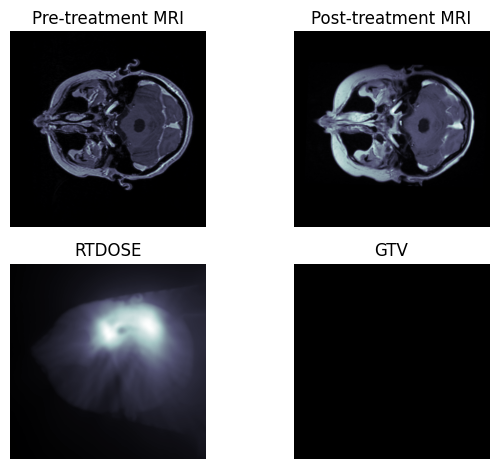

In [10]:
def imshow_patient(patient):
    pre_treatment_mri, post_treatment_mri, rtdose, gtv = patient
    
    fig, axes = plt.subplots(2, 2)
    
    axes[0, 0].imshow(pre_treatment_mri[:, :, 80], cmap='bone')
    axes[0, 0].set_title('Pre-treatment MRI')
    
    axes[0, 1].imshow(post_treatment_mri[:, :, 80], cmap='bone')
    axes[0, 1].set_title('Post-treatment MRI')
    
    axes[1, 0].imshow(rtdose[:, :, 80], cmap='bone')
    axes[1, 0].set_title('RTDOSE')
    
    axes[1, 1].imshow(gtv[:, :, 80], cmap='bone')
    axes[1, 1].set_title('GTV')
    
    for ax in axes.flatten():
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
imshow_patient(dataset[0])

# Normalization


In [11]:
'''pre = pre_frames_glob[0]
post = pre_frames_glob[1]

print(pre.shape)
print(post.shape)

pre_a = np.squeeze(pre)
post_a = np.squeeze(post)

print(pre_a.shape)
print(post_a.shape)

#plt.imshow(pre_a)
plt.imshow(post_a)
'''


'pre = pre_frames_glob[0]\npost = pre_frames_glob[1]\n\nprint(pre.shape)\nprint(post.shape)\n\npre_a = np.squeeze(pre)\npost_a = np.squeeze(post)\n\nprint(pre_a.shape)\nprint(post_a.shape)\n\n#plt.imshow(pre_a)\nplt.imshow(post_a)\n'

# Create torch dataset

In [12]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter
import time

In [13]:
class MRIDataset(Dataset):
    def __init__(self, pre_frames, post_frames, rt_frames):
        self.pre_frames = pre_frames
        self.post_frames = post_frames
        self.rt_frames = rt_frames
        
    def __len__(self):
        return len(self.pre_frames)
    
    def __getitem__(self, idx):
        pre_frame = self.pre_frames[idx]
        post_frame = self.post_frames[idx]
        rt_frame = self.rt_frames[idx]
        
        pre_torch = torch.from_numpy(pre_frame).float()
        post_torch = torch.from_numpy(post_frame).float()
        rt_torch = torch.from_numpy(rt_frame).float()
        
        pre_frame = nn.functional.normalize(pre_torch)
        post_frame = nn.functional.normalize(post_torch)
        rt_frame = nn.functional.normalize(rt_torch)
    
        
        
        return pre_frame, post_frame, rt_frame

In [14]:
dataset = MRIDataset(pre_frames_glob, post_frames_glob, rtdose_frames_glob)

In [20]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
val_size = int(0.2 * train_size)
train_size = train_size - val_size

train_dataset, test_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, test_size, val_size])
train_dataloader = DataLoader(train_dataset, batch_size=5, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=5, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=5, shuffle=True)


In [21]:
for pre, post, rtdose in train_dataloader:
    print(pre.shape)
    print(post.shape)
    print(rtdose.shape)
    break

torch.Size([5, 1, 512, 512])
torch.Size([5, 1, 512, 512])
torch.Size([5, 1, 512, 512])


# Create model

## UNet declaration

In [22]:
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        # couche d'encodage
        self.enc_conv1 = self.double_conv(2, 64)
        self.enc_conv2 = self.double_conv(64, 128)
        self.enc_conv3 = self.double_conv(128, 256)
        self.enc_conv4 = self.double_conv(256, 512)
        self.enc_conv5 = self.double_conv(512, 1024)

        # couche decocage
        self.dec_conv4 = self.double_conv(1024 + 512, 512)
        self.dec_conv3 = self.double_conv(512 + 256, 256)
        self.dec_conv2 = self.double_conv(256 + 128, 128)
        self.dec_conv1 = self.double_conv(128 + 64, 64)

        # sortie
        self.final_conv = nn.Conv2d(64, 1, kernel_size=1)


        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)

    def double_conv(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):

        # chemin descendant
        x1 = self.enc_conv1(x)
        x2 = self.pool(x1)
        x2 = self.enc_conv2(x2)
        x3 = self.pool(x2)
        x3 = self.enc_conv3(x3)
        x4 = self.pool(x3)
        x4 = self.enc_conv4(x4)
        x5 = self.pool(x4)
        x5 = self.enc_conv5(x5)

        # chemin ascendant
        x = self.up(x5)
        x = torch.cat([x, x4], dim=1)
        x = self.dec_conv4(x)
        x = self.up(x)
        x = torch.cat([x, x3], dim=1)
        x = self.dec_conv3(x)
        x = self.up(x)
        x = torch.cat([x, x2], dim=1)
        x = self.dec_conv2(x)
        x = self.up(x)
        x = torch.cat([x, x1], dim=1)
        x = self.dec_conv1(x)

        # sortie
        x = self.final_conv(x)
        return x


In [23]:
class DiffusionModel(nn.Module):
    def __init__(self, unet_model, num_timesteps):
        super(DiffusionModel, self).__init__()
        self.unet_model = unet_model.to(device)
        self.num_timesteps = num_timesteps
        self.beta_schedule = torch.linspace(0.0001, 0.02, num_timesteps).to(device) 

    def forward(self, x):
        
        t = torch.randint(0, self.num_timesteps, (x.size(0),), device=x.device)
        
        beta_t = self.beta_schedule[t].unsqueeze(1).unsqueeze(2).unsqueeze(3)
        noise = torch.randn_like(x)
        noised_x = torch.sqrt(1 - beta_t) * x + torch.sqrt(beta_t) * noise

        # unet prediction du bruit
        predicted_noise = self.unet_model(noised_x)

        return predicted_noise


In [24]:
def train_diffusion_model(model, dataloader, optimizer, loss_function, num_epochs, beta_schedule, evalu, 
                          num_timesteps=None, writer=None):
    model.to(device)
    num_batches = len(dataloader)
    saved_predicted = None
    saved_real = None
    
    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        epoch_loss = 0.0
        learn_loss = 0.0 
        start_time = time.time()
        for i, (pre_frame, post_frame, rt_frame) in enumerate(dataloader):
            print(f"Batch {i+1}/{len(dataloader)}", end='\r')
            pre_frame = pre_frame.to(device)
            post_frame = post_frame.to(device)
            rt_frame = rt_frame.to(device)
                    
            t = torch.randint(0, len(beta_schedule), (pre_frame.size(0),), device=pre_frame.device)

            # calcul du bruit
            beta_t = beta_schedule[t].unsqueeze(1).unsqueeze(2).unsqueeze(3)
            noise = torch.randn_like(pre_frame)
            noised_pre_frame = torch.sqrt(1 - beta_t) * pre_frame + torch.sqrt(beta_t) * noise
        

            # fusion de l'IRM prétraitement + la RTdose pour le passer dans le unet
            input_tensor = torch.cat([noised_pre_frame, rt_frame], dim=1)

            predicted_post_frame = model(input_tensor)

            # calcul de la loss
            loss = loss_function(predicted_post_frame, post_frame)
            epoch_loss += loss.item()
            
            learn = loss_function(pre_frame, post_frame)
            learn_loss += learn.item()
            
            if i == 0 and writer is not None:
                if not evalu :
                    saved_predicted = predicted_post_frame[i].detach().cpu()
                    saved_real = post_frame[i].detach().cpu()

            # mise a jour des poids
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        #epoch_loss /= num_batches   
        end_time = time.time()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, LearnLoss: {learn_loss:.4f}, Time: {end_time - start_time}s")
    
        if writer is not None:
            
            if not evalu :
                writer.add_scalars('Loss/train', {'predict':epoch_loss, 'learn':learn_loss}, epoch)
                writer.add_image('Image/Predicted Image', saved_predicted[0], epoch, dataformats='HW')
                writer.add_image('Image/Real Image', saved_real[0], epoch, dataformats='HW')
            
            else:
                writer.add_scalars(f'Eval/train{loss_function.__class__.__name__}_lr{lr}_timesteps{num_timesteps}', {'predict':epoch_loss, 'learn':learn_loss}, epoch)

            
            
        
        torch.save(model.state_dict(), 'checkpoint.pt')

In [26]:
if torch.cuda.is_available():
    device = torch.device("cuda:1")
    print("le modèle tournera via votre GPU")
else:
    device = torch.device("cpu")
    print("le modèle tournera via votre CPU")
    

le modèle tournera via votre GPU


In [29]:
unet_model = UNet()
#unet_model = nn.DataParallel(unet_model)
#unet_model.to(device)


diffusion_model = DiffusionModel(unet_model, num_timesteps=500)
#diffusion_model = nn.DataParallel(diffusion_model)
#diffusion_model.to(device)


optimizer = torch.optim.Adam(diffusion_model.parameters(), lr=0.001)
loss_function = nn.L1Loss()

beta_schedule = torch.linspace(0.001, 0.02, 500).to(device)

writer = SummaryWriter()

train_diffusion_model(model=diffusion_model, dataloader=train_dataloader, optimizer=optimizer, 
                      loss_function=loss_function, num_epochs=100, beta_schedule=beta_schedule,
                      writer=writer, evalu=False)

writer.close()

Epoch 1/100
Epoch [1/100], Loss: 1.3009, LearnLoss: 0.8875, Time: 21.26482915878296s
Epoch 2/100
Epoch [2/100], Loss: 0.8420, LearnLoss: 0.8876, Time: 21.404455423355103s
Epoch 3/100
Epoch [3/100], Loss: 0.8017, LearnLoss: 0.8872, Time: 21.58726453781128s
Epoch 4/100
Epoch [4/100], Loss: 0.7710, LearnLoss: 0.8873, Time: 21.611116886138916s
Epoch 5/100
Epoch [5/100], Loss: 0.7494, LearnLoss: 0.8872, Time: 21.551459312438965s
Epoch 6/100
Epoch [6/100], Loss: 0.7339, LearnLoss: 0.8872, Time: 21.50046682357788s
Epoch 7/100
Epoch [7/100], Loss: 0.7232, LearnLoss: 0.8872, Time: 21.473572254180908s
Epoch 8/100
Epoch [8/100], Loss: 0.7065, LearnLoss: 0.8873, Time: 21.46323823928833s
Epoch 9/100
Epoch [9/100], Loss: 0.6959, LearnLoss: 0.8868, Time: 21.451700925827026s
Epoch 10/100
Epoch [10/100], Loss: 0.6953, LearnLoss: 0.8877, Time: 21.44051742553711s
Epoch 11/100
Epoch [11/100], Loss: 0.6841, LearnLoss: 0.8870, Time: 21.439341068267822s
Epoch 12/100
Epoch [12/100], Loss: 0.6613, LearnLoss: 0

KeyboardInterrupt: 

In [ ]:
torch.save(diffusion_model.state_dict(), 'diffusion_model.pt')

## Optimisation des hyperparamètres

In [56]:
import itertools
import optuna

## Evaluation

In [84]:
def evaluate_model(model, dataloader, beta_schedule, loss_function , device):
    
    model.eval()
    total_loss = 0.0
    total_samples = 0
    
    
    with torch.no_grad():
        for i, (pre_frame, post_frame, rt_frame) in enumerate(dataloader):
            pre_frame = pre_frame.to(device)
            post_frame = post_frame.to(device)
            rt_frame = rt_frame.to(device)
                    
            t = torch.randint(0, len(beta_schedule), (pre_frame.size(0),), device=pre_frame.device)
            beta_t = beta_schedule[t].unsqueeze(1).unsqueeze(2).unsqueeze(3)
            noise = torch.randn_like(pre_frame)
            noised_pre_frame = torch.sqrt(1 - beta_t) * pre_frame + torch.sqrt(beta_t) * noise
        
            input_tensor = torch.cat([noised_pre_frame, rt_frame], dim=1)

            predicted_post_frame = model(input_tensor)

            loss = loss_function(predicted_post_frame, post_frame)
            total_loss += loss.item()
            total_samples += pre_frame.size(0)
            
    return total_loss / total_samples

In [85]:
def objective(trial):
    
    loss = trial.suggest_categorical('loss_function',["l1", "mse"])
    num_timesteps = trial.suggest_int('num_timesteps',10,3000)
    lr = trial.suggest_float('lr', 1e-5, 1e-3)
    batch_size = trial.suggest_int('batch_size',1,10)
    optimizer = trial.suggest_categorical("optimizer", ["Adam","SGD"])
    num_epochs = trial.suggest_int('num_epochs',10,100)
    
    print("------------------------------------------------------------------------------------------------")
    print(f'Testing with loss function: {loss}, num_timesteps: {num_timesteps}, lr: {lr}, batch_size: {batch_size}',
          f' optimizer: {optimizer}, num_epochs: {num_epochs}')
    
    
    dataloader_train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    dataloader_val = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

    unet = UNet()
    unet.to(device)
    
    diffusion_model = DiffusionModel(unet, num_timesteps=num_timesteps)
    diffusion_model.to(device)
    
    beta_schedule = torch.linspace(0.001, 0.02, num_timesteps).to(device)
    
    if optimizer == "Adam":
        optimizer = torch.optim.Adam(itertools.chain(diffusion_model.parameters()), lr=lr)
        
    elif optimizer == "SGD":
        optimizer = torch.optim.SGD(itertools.chain(diffusion_model.parameters()), lr=lr)
        
    
    if loss == "l1":
        loss_function = nn.L1Loss()
    
    
    elif loss == "mse":
        loss_function = nn.MSELoss()
        

    train_loss = train_diffusion_model(diffusion_model, train_dataloader, optimizer, loss_function, num_epochs, beta_schedule, writer=None, evalu=True)    
    
    average_loss = evaluate_model(model=diffusion_model, dataloader=dataloader_val, 
                                  beta_schedule=beta_schedule, loss_function=loss_function, device=device)
    
    print(average_loss)
    
    return average_loss


In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=25)

print("------------------------------------ BEST PARAMS ---------------------------------------")
print(study.best_trial.params)

[I 2024-01-31 11:10:16,932] A new study created in memory with name: no-name-9d4c569f-e7fd-43bb-aacb-c4596b5900dd


------------------------------------------------------------------------------------------------
Testing with loss function: l1, num_timesteps: 605, lr: 0.0007720752824838013, batch_size: 3  optimizer: SGD, num_epochs: 24
Epoch 1/24
Epoch [1/24], Loss: 2.2045, LearnLoss: 0.4393, Time: 24.113916397094727s
Epoch 2/24
Epoch [2/24], Loss: 1.4430, LearnLoss: 0.4393, Time: 24.75963044166565s
Epoch 3/24
Epoch [3/24], Loss: 1.1997, LearnLoss: 0.4392, Time: 24.425116539001465s
Epoch 4/24
Epoch [4/24], Loss: 1.1188, LearnLoss: 0.4393, Time: 23.93409252166748s
Epoch 5/24
Epoch [5/24], Loss: 1.0807, LearnLoss: 0.4392, Time: 24.14416813850403s
Epoch 6/24
Epoch [6/24], Loss: 1.0616, LearnLoss: 0.4393, Time: 24.2979953289032s
Epoch 7/24


In [ ]:
loss_functions = [nn.L1Loss(), nn.MSELoss()]
num_timesteps_list = [10,50,100,500,1000,1500]
learning_rates = [0.001,0.0001,0.00001]

writer = SummaryWriter()

for loss_function, num_timesteps, lr in product(loss_functions, num_timesteps_list, learning_rates):
    print("------------------------------------------------------------------------------------------------")
    print(f'Testing with loss function: {loss_function}, num_timesteps: {num_timesteps}, lr: {lr}')

    beta_schedule = torch.linspace(lr, 0.02, num_timesteps).to(device)
    optimizer = torch.optim.Adam(diffusion_model.parameters(), lr=lr)
    
    train_diffusion_model(model=diffusion_model, dataloader=train_dataloader, 
                          optimizer=optimizer, loss_function=loss_function, num_epochs=20, beta_schedule=beta_schedule, 
                          evalu=True, num_timesteps=num_timesteps, writer=writer)
    
    
    

## Test avec FullyConnected Model

In [19]:
class Fully(nn.Module):
    def __init__(self):
        super(Fully, self).__init__()
        
        self.fully1 = nn.Linear(512,512)

    def forward(self, x):
        
        out = self.fully1(x)

        return out

In [20]:
def train_fully_model(model, dataloader, optimizer, loss_function, num_epochs, writer=None):
    model.to(device)
    num_batches = len(dataloader)
    saved_predicted = None
    saved_real = None
    
    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        epoch_loss = 0.0
        learn_loss = 0.0
        start_time = time.time()
        for i, (pre_frame, post_frame, rt_frame) in enumerate(dataloader):
            print(f"Batch {i+1}/{len(dataloader)}", end='\r')
            pre_frame = pre_frame.to(device)
            post_frame = post_frame.to(device)
            rt_frame = rt_frame.to(device)
            
            input_tensor = torch.cat([pre_frame, rt_frame], dim=1)
            
            predicted_post_frame = model(input_tensor)
            
            # calcul de la loss
            loss = loss_function(predicted_post_frame, post_frame)
            epoch_loss += loss.item()
            
            learn = loss_function(pre_frame, pre_frame)
            learn_loss += learn.item()
            
            if i == 0 and writer is not None:
                saved_predicted = predicted_post_frame[i].detach().cpu()
                saved_real = post_frame[i].detach().cpu()
            
            # mise a jour des poids
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        epoch_loss /= num_batches   
        learn_loss /= num_batches   
        end_time = time.time()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Time: {end_time - start_time}s")
    
        if writer is not None:
            writer.add_scalar('Loss/train', epoch_loss, epoch)
            writer.add_scalar('Loss/learn', learn_loss, epoch)

    
            writer.add_image('Predicted Image', saved_predicted[0], epoch, dataformats='HW')
            writer.add_image('Real Image', saved_real[0], epoch, dataformats='HW')
            
            
        
        torch.save(model.state_dict(), 'fully.pt')            
            
    

In [ ]:
fully_model = Fully()
optimizer = torch.optim.Adam(diffusion_model.parameters(), lr=0.001)
loss_function = nn.MSELoss()
writer = SummaryWriter()

train_fully_model(fully_model, train_dataloader, optimizer, 
                      loss_function, num_epochs=50,writer=writer)

writer.close()